In [19]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import accuracy_score , plot_confusion_matrix , roc_curve
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

In [2]:
main_data = pd.read_csv('main.csv')
main_data.head(5)

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,write,TRUE,1.520030e+12,normal
1,battery4,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,TRUE,1.520030e+12,normal
2,washingmachine3,/agent14/washingmachine3,/washingService,Showerroom,/agent12/battery5,/batteryService,Entrance,/agent12/battery5/charging,/basic/text,write,TRUE,1.520030e+12,normal
3,washingmachine1,/agent6/washingmachine1,/washingService,Bathroom,/agent5/battery1,/batteryService,Garage,/agent5/battery1/charging,/basic/text,write,TRUE,1.520030e+12,normal
4,battery1,/agent5/battery1,/batteryService,Garage,/agent5/battery1,/batteryService,Garage,/agent5/battery1/charging,/basic/text,read,TRUE,1.520030e+12,normal


In [3]:
Features_ = main_data.drop( columns =  ['sourceAddress','destinationServiceAddress','accessedNodeAddress','timestamp','timestamp'] )
y_column = main_data['normality']

In [4]:
Features_.head(5)

,sourceID,sourceType,sourceLocation,destinationServiceType,destinationLocation,accessedNodeType,operation,value,normality
0,washingmachine2,/washingService,Watterroom,/batteryService,Watterroom,/basic/text,write,TRUE,normal
1,battery4,/batteryService,Watterroom,/batteryService,Watterroom,/basic/text,read,TRUE,normal
2,washingmachine3,/washingService,Showerroom,/batteryService,Entrance,/basic/text,write,TRUE,normal
3,washingmachine1,/washingService,Bathroom,/batteryService,Garage,/basic/text,write,TRUE,normal
4,battery1,/batteryService,Garage,/batteryService,Garage,/basic/text,read,TRUE,normal


In [5]:
print('the main features are \n\n' , list(Features_.columns))

the main features are 

 ['sourceID', 'sourceType', 'sourceLocation', 'destinationServiceType', 'destinationLocation', 'accessedNodeType', 'operation', 'value', 'normality']


In [6]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

Features_['accessedNodeType'] = Features_['accessedNodeType'].fillna('/Malicious')

Features_['value'] = Features_['value'].replace({'FALSE': 0.0 , 'TRUE':1.0 , 'twenty':20.0 ,'none':0.0 })
Features_['value'] = Features_['value'].fillna(0.0)

Features_['sourceType']= label_encoder.fit_transform(Features_['sourceType']) 
Features_['sourceLocation']= label_encoder.fit_transform(Features_['sourceLocation'])
Features_['sourceLocation']= label_encoder.fit_transform(Features_['sourceLocation']) 
Features_['destinationServiceType']= label_encoder.fit_transform(Features_['destinationServiceType']) 
Features_['accessedNodeType']= label_encoder.fit_transform(Features_['accessedNodeType']) 
Features_['operation']= label_encoder.fit_transform(Features_['operation'])  
Features_['accessedNodeType']= label_encoder.fit_transform(Features_['accessedNodeType'])
Features_['destinationLocation']= label_encoder.fit_transform(Features_['destinationLocation']) 
Features_['sourceID'] = label_encoder.fit_transform(Features_['sourceID']) 

Features_ = Features_.drop( columns =  'normality')
#Features_ = Features_.drop( columns =  'sourceID')

#y_column = label_encoder.fit_transform(y_column)

Features_.head(5)


,sourceID,sourceType,sourceLocation,destinationServiceType,destinationLocation,accessedNodeType,operation,value
0,82,7,10,0,10,3,3,1
1,3,0,10,0,10,3,1,1
2,83,7,9,0,5,3,3,1
3,81,7,0,0,6,3,3,1
4,0,0,6,0,6,3,1,1


In [332]:
#passing  = Features_['value'].map( lambda x : x.find('E') if( type(x) == str ) else -1 )
#Features_ = Features_.drop( index =  list(passing[ passing != -1 ].index) , axis = 'rows')
#Features_['destinationServiceType']  = Features_['destinationServiceType'].map(lambda x: x[1:] )
#Features_['accessedNodeType']  =  Features_['accessedNodeType'].map( lambda x: x[1:] )
#Features_['sourceType']  =    Features_['sourceType'].map(lambda x: x[1:] )

#Features_['value'] = Features_['value'].map(lambda x:  20.5 if(x > 20.5) else x )
#x_train.select_dtypes(exclude=["float", 'int'])
#sum(x_train['value'].map(lambda x: type(x) == str ))
#x_train[x_train['value'].find('E')]
#x_train['value'] = x_train['value'].map(lambda x:  "".join(x.split())  if( type(x) == str)  else  x )
#passingpop  = Features_['value'].map( lambda x : x.find('E') if( type(x) == str ) else -1 )

In [7]:
Features_['value'] = Features_['value'].map(lambda x : float(x) )
x_train , x_test , y_train , y_test = train_test_split(Features_,y_column , test_size = 0.2 , random_state = 3  )

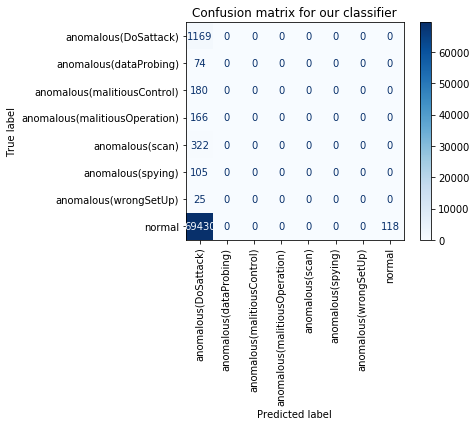

<Figure size 720x720 with 0 Axes>

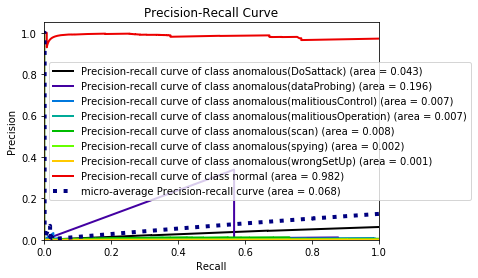

In [24]:
naiveBayes  =  GaussianNB()
naiveBayes.fit(x_train,y_train)
naiveBayesPreds = naiveBayes.predict(x_test)
naiveBayesPreds_probs  = naiveBayes.predict_proba(x_test)
accuracy_score(naiveBayesPreds,y_test) * 100

naiveBayesMatrix = plot_confusion_matrix(naiveBayes, x_test, y_test,values_format="d",
                                 cmap=plt.cm.Blues,xticks_rotation = 'vertical')
plt.title('Confusion matrix for our classifier')
plt.show(naiveBayesMatrix)
plt.show()
plt.figure(figsize=(10,10))
skplt.metrics.plot_precision_recall_curve(y_test, naiveBayesPreds_probs)
plt.show()

In [26]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

array([[0.57748141, 0.03356431, 0.08879512, ..., 0.05347746, 0.01214828,
        0.00108616],
       [0.57748141, 0.03356431, 0.08879512, ..., 0.05347746, 0.01214828,
        0.00108616],
       [0.57748141, 0.03356431, 0.08879512, ..., 0.05347746, 0.01214828,
        0.00108616],
       ...,
       [0.57748141, 0.03356431, 0.08879512, ..., 0.05347746, 0.01214828,
        0.00108616],
       [0.57748141, 0.03356431, 0.08879512, ..., 0.05347746, 0.01214828,
        0.00108616],
       [0.57748141, 0.03356431, 0.08879512, ..., 0.05347746, 0.01214828,
        0.00108616]])

In [27]:
y_test

175859    normal
342471    normal
170302    normal
295096    normal
176767    normal
           ...  
286120    normal
278759    normal
173342    normal
289325    normal
190692    normal
Name: normality, Length: 71589, dtype: object

In [25]:
fpr, tpr, threshold = roc_curve(y_test, naiveBayesPreds_probs)

ValueError: multiclass format is not supported

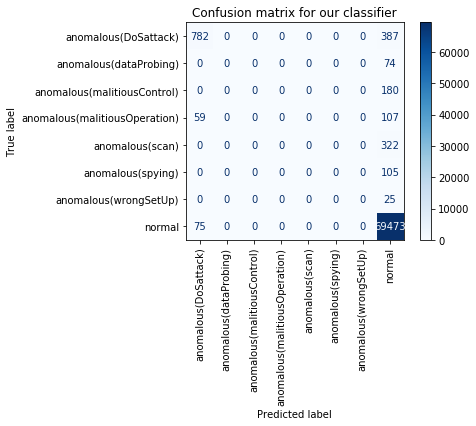

In [36]:
LogisticRegressionModel2 = LogisticRegression()
LogisticRegressionModel2.fit(x_train,y_train)
LogisticRegressionPreds = LogisticRegressionModel2.predict(x_test)
accuracy_score(LogisticRegressionPreds,y_test) * 100

LogisticRegressionMatrix = plot_confusion_matrix(LogisticRegressionModel2, x_test, y_test,values_format="d",
                                 cmap=plt.cm.Blues,xticks_rotation = 'vertical')
plt.title('Confusion matrix for our classifier')
plt.show(LogisticRegressionMatrix)
plt.show()

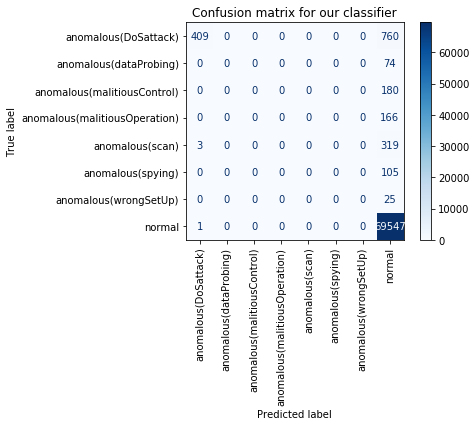

In [19]:
AdaBoostclf = AdaBoostClassifier(n_estimators=7, random_state=0)
AdaBoostclf.fit(x_train, y_train)
#AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoostPrediction = AdaBoostclf.predict(x_test)
accuracy_score(AdaBoostPrediction,y_test) * 100

AdaBoostMatrix = plot_confusion_matrix(AdaBoostclf, x_test, y_test,values_format="d",
                                 cmap=plt.cm.Blues,xticks_rotation = 'vertical')
plt.title('Confusion matrix for our classifier')
plt.show(AdaBoostMatrix)
plt.show()

In [21]:
from sklearn.neural_network import MLPClassifier

MLPclf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

MLP_prediction = MLPclf.predict(x_test)

accuracy_score(MLP_prediction,y_test)

0.993085529899845

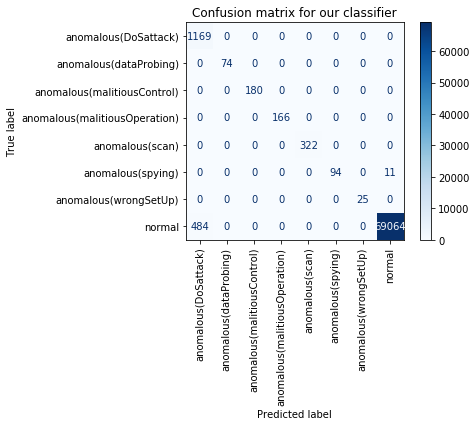

In [22]:
MlpMatrix = plot_confusion_matrix(MLPclf, x_test, y_test,values_format="d",cmap=plt.cm.Blues,xticks_rotation = 'vertical')
plt.title('Confusion matrix for our classifier')
plt.show(MlpMatrix)
plt.show()

In [10]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=7).fit(x_train, y_train)
gcp_pred = gpc.predict(x_test)
accuracy_score(gcp_pred,y_test)

In [ ]:
gpc_Matrix = plot_confusion_matrix(gpc, x_test, y_test,values_format="d",
                                 cmap=plt.cm.Blues,xticks_rotation = 'vertical')
plt.title('Confusion matrix for our classifier')
plt.show(gpc_Matrix)
plt.show()

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np

QuadraticDiscriminant_Clf = QuadraticDiscriminantAnalysis()
QuadraticDiscriminant_Clf.fit(x_train, y_train)
QuadraticDiscriminantPreds = QuadraticDiscriminant_Clf.predict(x_test)


In [9]:
accuracy_score(QuadraticDiscriminantPreds,y_test)

1.632932433753789

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output


In [30]:
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [32]:
ybinarise = label_binarize(y_column , classes=[0,1,2,3,4,5,6,7])

In [35]:
ybinarise[3]

array([0, 0, 0, 0, 0, 0, 0, 0])